## Exploratory Data Analysis

<a href='http://proquest.safaribooksonline.com.proxy.lib.odu.edu/book/databases/9781449363871/2dot-statistical-inference-exploratory-data-analysis-and-the-data-science-process/_exploratory_data_analysis_html'> Reference </a>



In [2]:
# importing libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from ggplot import *
import requests
import io
import math

import warnings
warnings.filterwarnings('ignore')

In [3]:
# downloading data
url = 'http://stat.columbia.edu/~rachel/datasets/nyt1.csv'
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

data.head()

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


In [4]:
# describe the data to view the column wise summary statistics
data.describe()

,Age,Gender,Impressions,Clicks,Signed_In
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930
std,23.607034,0.481997,2.239349,0.309973,0.457851
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000


In [5]:
df  = pd.Series(np.linspace(2.0, 3.0, num=5)) 
print (df)



0    2.00
1    2.25
2    2.50
3    2.75
4    3.00
dtype: float64


In [6]:
pd.cut(df, bins = [0, 2.0, 2.5, 2.75, 3.0], labels=[0 , 1, 2, 3], include_lowest = True)
#pd.cut(df, bins = [0, 2.0, 2.5, 2.75, 3.0], include_lowest = True)

0    0
1    1
2    1
3    2
4    3
dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [7]:
dataN = pd.DataFrame(data)
# categorize the data based on Age value across the bin intervals.
dataN['age_cat'] = pd.cut(data['Age'], bins = [0, 17, 24, 34, 44, 54, 64, 108], labels=[0 , 1, 2, 3, 4, 5, 6], include_lowest = True)
# view categories
dataN.head(3)

,Age,Gender,Impressions,Clicks,Signed_In,age_cat
0,36,0,3,0,1,3
1,73,1,3,0,1,6
2,30,0,3,0,1,2


In [8]:
import seaborn as sns
sns.set(color_codes=True)

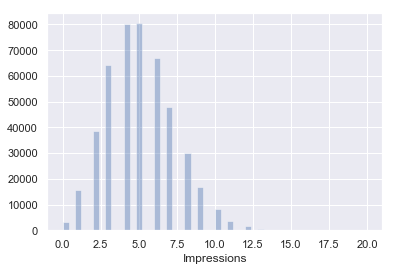

In [9]:
 ax = sns.distplot(dataN['Impressions'],  kde=False)

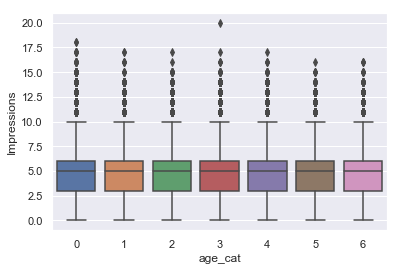

In [10]:
sns.boxplot(x="age_cat", y="Impressions", data=dataN);

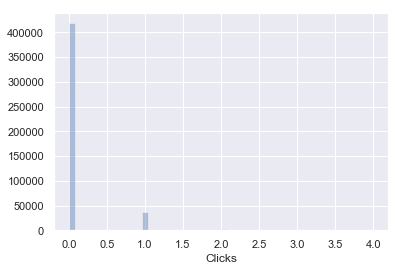

In [11]:
 ax = sns.distplot(dataN['Clicks'],  kde=False)

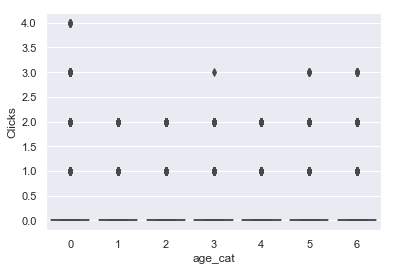

In [12]:
sns.boxplot(x="age_cat", y="Clicks", data=dataN);

Text(0, 0.5, 'Frequency')

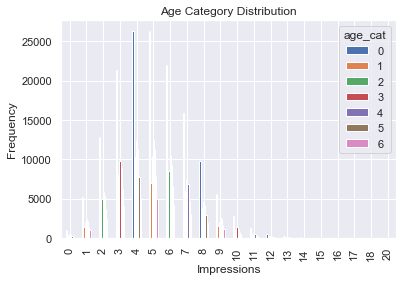

In [13]:
pd.crosstab(dataN.Impressions, dataN.age_cat).plot(kind='bar')
plt.title('Age Category Distribution')
plt.xlabel('Impressions')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

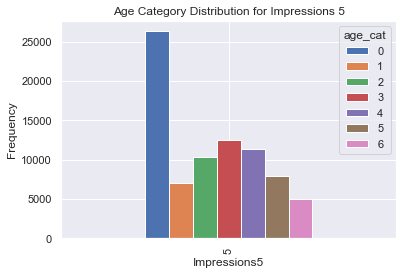

In [14]:
dataN5 = dataN.loc[dataN['Impressions'] == 5]
pd.crosstab(dataN5.Impressions, dataN.age_cat).plot(kind='bar')
plt.title('Age Category Distribution for Impressions 5')
plt.xlabel('Impressions5')
plt.ylabel('Frequency')

In [15]:
data_age = dataN['Age']
data_imp = dataN['Impressions']
dataf = data_age[(data_age==0) & (data_imp==5)]
np.shape(dataf)

(23935,)

In [22]:
# work on a subset with clicks > 0
data_click_subset = dataN[dataN['Clicks'] > 0]
data_click_subset.head()

,Age,Gender,Impressions,Clicks,Signed_In,age_cat,Click_cat
5,47,0,11,1,1,4,0
6,0,0,7,1,0,0,0
10,0,0,8,1,0,0,0
39,0,0,7,2,0,0,1
63,0,0,2,1,0,0,0


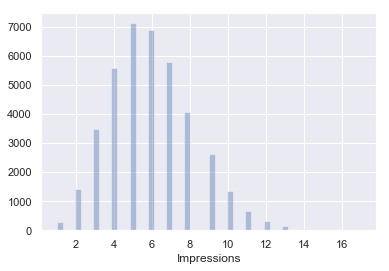

In [17]:
 ax = sns.distplot(data_click_subset['Impressions'],  kde=False)

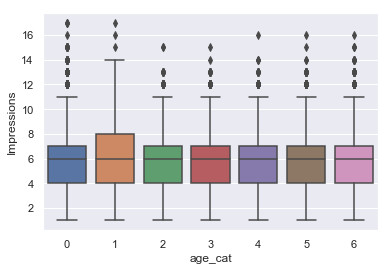

In [18]:
sns.boxplot(x="age_cat", y="Impressions", data=data_click_subset);

Text(0, 0.5, 'Frequency')

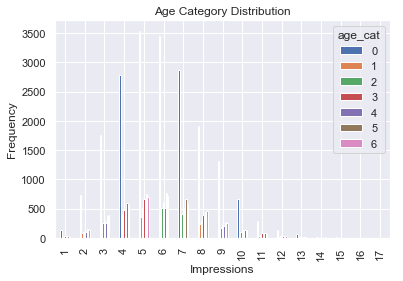

In [16]:
pd.crosstab(data_click_subset.Impressions, data_click_subset.age_cat).plot(kind='bar')
plt.title('Age Category Distribution')
plt.xlabel('Impressions')
plt.ylabel('Frequency')

Exercise.  Define a new variable to segment or categorize users based on their click behavior. For this use the data subset 'data_click_subset'

In [23]:
data_click_subset['Click_cat'] = pd.cut(data_click_subset['Clicks'], bins = [0,1,2,3,4], labels=[0 , 1, 2, 3], include_lowest = True)
data_click_subset.head()

,Age,Gender,Impressions,Clicks,Signed_In,age_cat,Click_cat
5,47,0,11,1,1,4,0
6,0,0,7,1,0,0,0
10,0,0,8,1,0,0,0
39,0,0,7,2,0,0,1
63,0,0,2,1,0,0,0


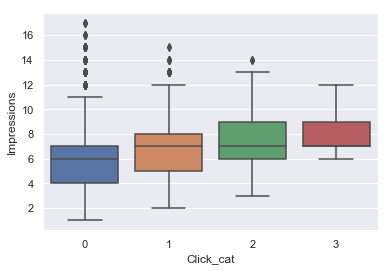

In [24]:
sns.boxplot(x="Click_cat", y="Impressions", data=data_click_subset);

Text(0, 0.5, 'Frequency')

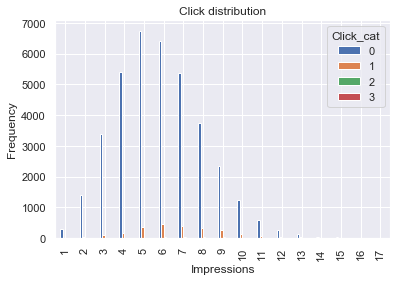

In [25]:
pd.crosstab(data_click_subset.Impressions, data_click_subset.Click_cat).plot(kind='bar')
plt.title('Click distribution')
plt.xlabel('Impressions')
plt.ylabel('Frequency')